<a href="https://colab.research.google.com/github/TanushGoel/Machine-Learning-Playground/blob/master/Chest_XRays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 -q install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 99kB/s 


In [0]:
!pip3 -q install keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import os
from os.path import isfile
import tensorflow as tf
import keras
from keras.utils import np_utils
import itertools
import shutil
np.random.seed(42)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Using TensorFlow backend.


In [4]:
tf.__version__

'1.14.0'

In [5]:
tf.keras.__version__

'2.2.4-tf'

In [0]:
!pip3 -q install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanushgoel","key":"853a980360a6b00ffc414a7e499a7aa4"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.27G/2.29G [00:40<00:00, 71.2MB/s]
100% 2.29G/2.29G [00:40<00:00, 60.7MB/s]


In [0]:
os.listdir()

['.config', 'chest-xray-pneumonia.zip', 'kaggle.json', 'sample_data']

In [0]:
!unzip -o -q 'chest-xray-pneumonia.zip'

In [0]:
os.listdir()

['.config',
 'chest-xray-pneumonia.zip',
 'kaggle.json',
 'chest_xray',
 'sample_data']

In [0]:
os.listdir('chest_xray')

['test', 'train', 'chest_xray', '__MACOSX', 'val']

In [0]:
os.listdir('chest_xray/train')

['PNEUMONIA', 'NORMAL']

In [22]:
print('Train Pneumonia:', len(os.listdir('chest_xray/train/PNEUMONIA')))
print('Train Normal:', len(os.listdir('chest_xray/train/NORMAL')))

Train Pneumonia: 3875
Train Normal: 1341


In [0]:
os.listdir('chest_xray/val')

['PNEUMONIA', 'NORMAL']

In [23]:
print('Valid Pneumonia:', len(os.listdir('chest_xray/val/PNEUMONIA')))
print('Valid Normal:', len(os.listdir('chest_xray/val/NORMAL')))

Valid Pneumonia: 8
Valid Normal: 8


In [0]:
os.listdir('chest_xray/test')

['PNEUMONIA', 'NORMAL']

In [24]:
print('Test Pneumonia:', len(os.listdir('chest_xray/test/PNEUMONIA')))
print('Test Normal:', len(os.listdir('chest_xray/test/NORMAL')))

Test Pneumonia: 390
Test Normal: 234


In [0]:
image_size = 224

train_path = 'chest_xray/train'
valid_path = 'chest_xray/val'
test_path = 'chest_xray/test'

num_train_samples = len(os.listdir('chest_xray/train/NORMAL')+os.listdir('chest_xray/train/PNEUMONIA'))
num_val_samples = len(os.listdir('chest_xray/val/NORMAL')+os.listdir('chest_xray/val/PNEUMONIA'))

train_batch_size = 50
val_batch_size = 1

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [29]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input, 
                             horizontal_flip=True,
                             vertical_flip=True)

train_batches_bench = datagen.flow_from_directory(train_path, 
                                                  target_size=(image_size, image_size),
                                                  batch_size=train_batch_size)

valid_batches_bench = datagen.flow_from_directory(valid_path,  
                                                  target_size=(image_size, image_size),
                                                  batch_size=val_batch_size)

test_batches_bench = datagen.flow_from_directory(test_path,  
                                                 target_size=(image_size, image_size),
                                                 batch_size=1,
                                                 shuffle=False) # test dataset should not be shuffled

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [30]:
print(train_batches_bench.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [0]:
class_weights={
    0: 1.0, 
    1: 1.0, 
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PNEUMONIA


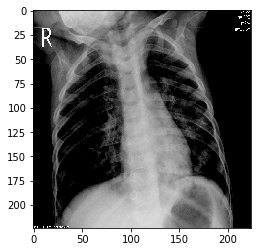

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NORMAL


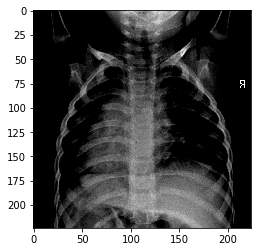

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NORMAL


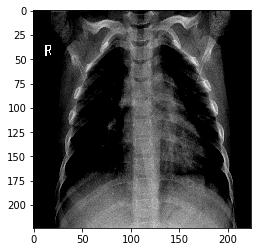

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PNEUMONIA


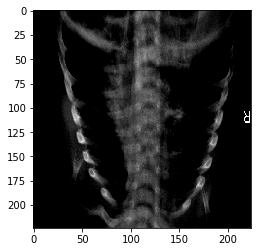

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PNEUMONIA


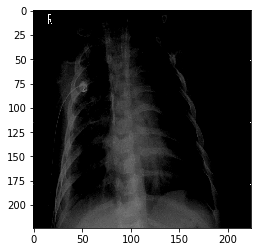

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NORMAL


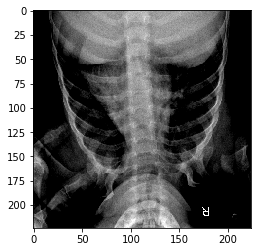

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NORMAL


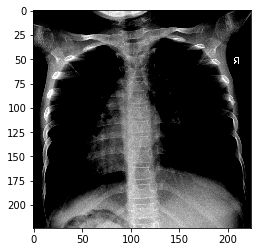

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PNEUMONIA


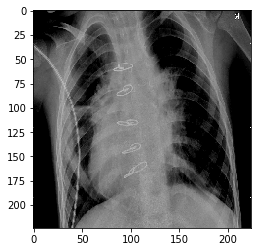

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NORMAL


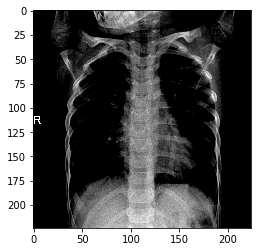

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NORMAL


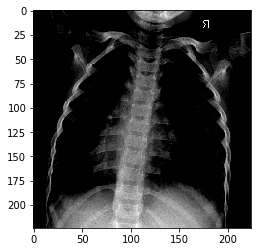

In [32]:
mappy = {i: j for j, i in train_batches_bench.class_indices.items()}

x, y = train_batches_bench.next()
for i in range(0,10):
    image = x[i]
    label = y[i]
    print(mappy[np.argmax(label, axis=0)])
    plt.imshow(image)
    plt.show()

In [33]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers
from keras.optimizers import Adam
import keras.backend.tensorflow_backend as K

benchmark = Sequential()
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(image_size, image_size, 3)))
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Dropout(0.35))
benchmark.add(Flatten())
benchmark.add(Dense(256, activation='relu'))
benchmark.add(Dropout(0.5))
benchmark.add(Dense(2, activation='softmax'))
benchmark.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 112, 112, 32)     

In [0]:
from keras import metrics
benchmark.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
from keras.callbacks import ModelCheckpoint
checkpointer_benchmark = ModelCheckpoint(filepath='chest_xrays_bench_best.hdf5', verbose=1, save_best_only=True)

history_benchmark = benchmark.fit_generator(train_batches_bench, 
                                            steps_per_epoch=train_steps, 
                                            class_weight=class_weights,
                                            validation_data=valid_batches_bench,
                                            validation_steps=val_steps,
                                            callbacks=[checkpointer_benchmark], 
                                            epochs=25, 
                                            verbose=1)

Epoch 1/25
105/105 [==============================] - 1239s 12s/step - loss: 0.3840 - acc: 0.8293 - val_loss: 0.6421 - val_acc: 0.7500

Epoch 00001: val_loss improved from inf to 0.64205, saving model to chest_xrays_bench_best.hdf5
Epoch 2/25
105/105 [==============================] - 1218s 12s/step - loss: 0.1755 - acc: 0.9333 - val_loss: 0.2306 - val_acc: 0.8750

Epoch 00002: val_loss improved from 0.64205 to 0.23058, saving model to chest_xrays_bench_best.hdf5
Epoch 3/25


KeyboardInterrupt: ignored

In [0]:
def plot_training(history):
  
    acc = history.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    
    plt.plot(epochs,acc, 'b')
    plt.plot(epochs,val_acc, 'r')
    plt.title("Training & Validation Accuracy")
    
    plt.figure()
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title("Training & Validation Loss")
    
    plt.show()

In [0]:
plot_training(history_benchmark)

In [0]:
benchmark.load_weights('chest_xrays_bench_best.hdf5')

In [40]:
preds = benchmark.predict_generator(test_batches_bench, steps=len(os.listdir('chest_xray/test/NORMAL')+os.listdir('chest_xray/test/PNEUMONIA')), verbose=1)

624/624 [==============================] - 48s 77ms/step


In [0]:
y_pred = np.argmax(preds, axis=1)
y_true = test_batches_bench.classes

In [42]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')

Accuracy: 0.849%
Balanced Accuracy: 0.818%


In [0]:
from sklearn.metrics import confusion_matrix

def matrix():
  conf_matrix = confusion_matrix(y_true, y_pred)
  plt.imshow(conf_matrix, interpolation='nearest', cmap='viridis')
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.tight_layout()

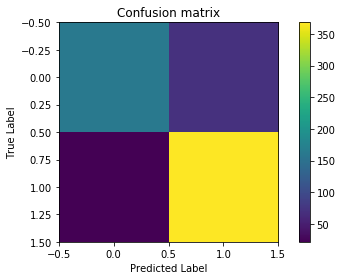

In [44]:
matrix()

In [45]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[162,  72],
       [ 22, 368]])

In [46]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.69      0.78       234
           1       0.84      0.94      0.89       390

    accuracy                           0.85       624
   macro avg       0.86      0.82      0.83       624
weighted avg       0.85      0.85      0.84       624



NORMAL


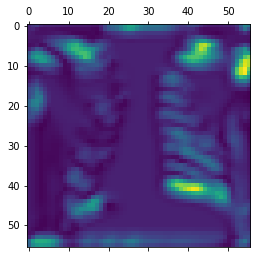

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


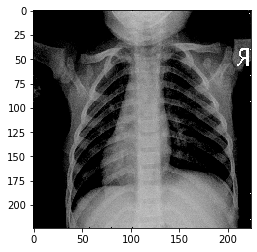

In [55]:
last_conv_layer = benchmark.layers[10]

x, y = valid_batches_bench.next()

label = y[0]
print(mappy[np.argmax(label, axis=0)])

output = benchmark.output[:, y_pred[0]]
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([benchmark.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(32):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

plt.imshow(x[0])
plt.show()

In [0]:
def get_name_layer_filters(model):
    filter_whole=[]
    layer_whole=[]
    for layer in model.layers:
        if 'conv' not in layer.name:
            continue
        filters,biases=layer.get_weights()
        filter_whole.append(filters)
        layer_whole.append(biases)
        print(layer.name, filters.shape)
    return filter_whole, layer_whole

In [206]:
filter_whole, layer_whole = get_name_layer_filters(benchmark)

conv2d_28 (3, 3, 3, 16)
conv2d_29 (3, 3, 16, 16)
conv2d_30 (3, 3, 16, 16)
conv2d_31 (3, 3, 16, 32)
conv2d_32 (3, 3, 32, 32)
conv2d_33 (3, 3, 32, 32)
conv2d_34 (3, 3, 32, 64)
conv2d_35 (3, 3, 64, 64)
conv2d_36 (3, 3, 64, 64)


In [207]:
cam_layer = benchmark.layers[2]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 16, 16)
(16,)


In [0]:
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

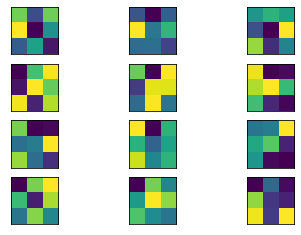

In [209]:
n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()    

In [0]:
from keras.models import Model
model_feature = Model(inputs=benchmark.inputs, outputs=cam_layer.output)

In [0]:
x, y = valid_batches_bench.next()
test_label = y[0]
test_image = x[0]
test_image_np = np.expand_dims(test_image, axis=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PNEUMONIA


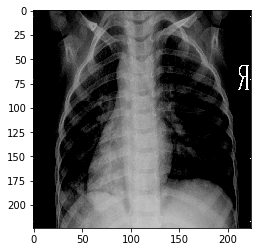

In [212]:
print(mappy[np.argmax(test_label, axis=0)])
plt.imshow(test_image)

In [213]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 224, 224, 16)

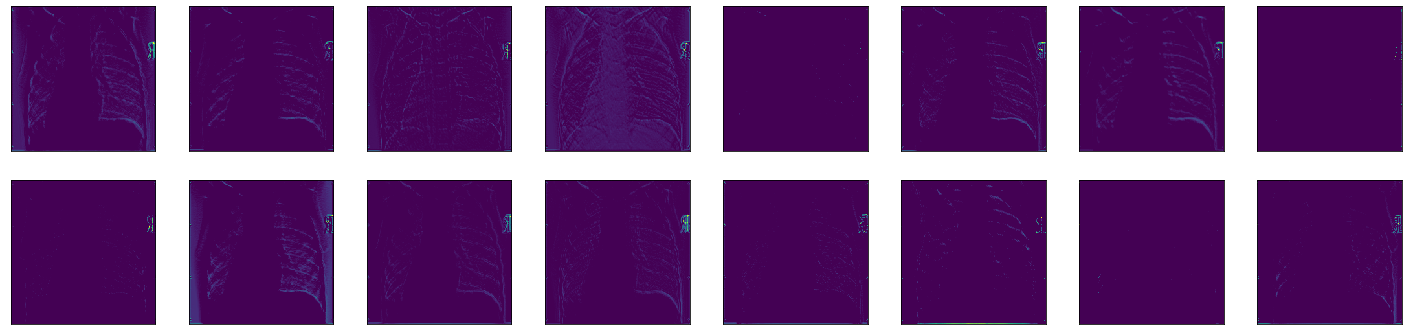

In [214]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(4):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

In [215]:
cam_layer = benchmark.layers[6]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 32, 32)
(32,)


In [0]:
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

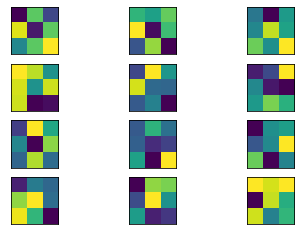

In [217]:
n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show() 

In [0]:
model_feature = Model(inputs=benchmark.inputs, outputs=cam_layer.output)

In [219]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 112, 112, 32)

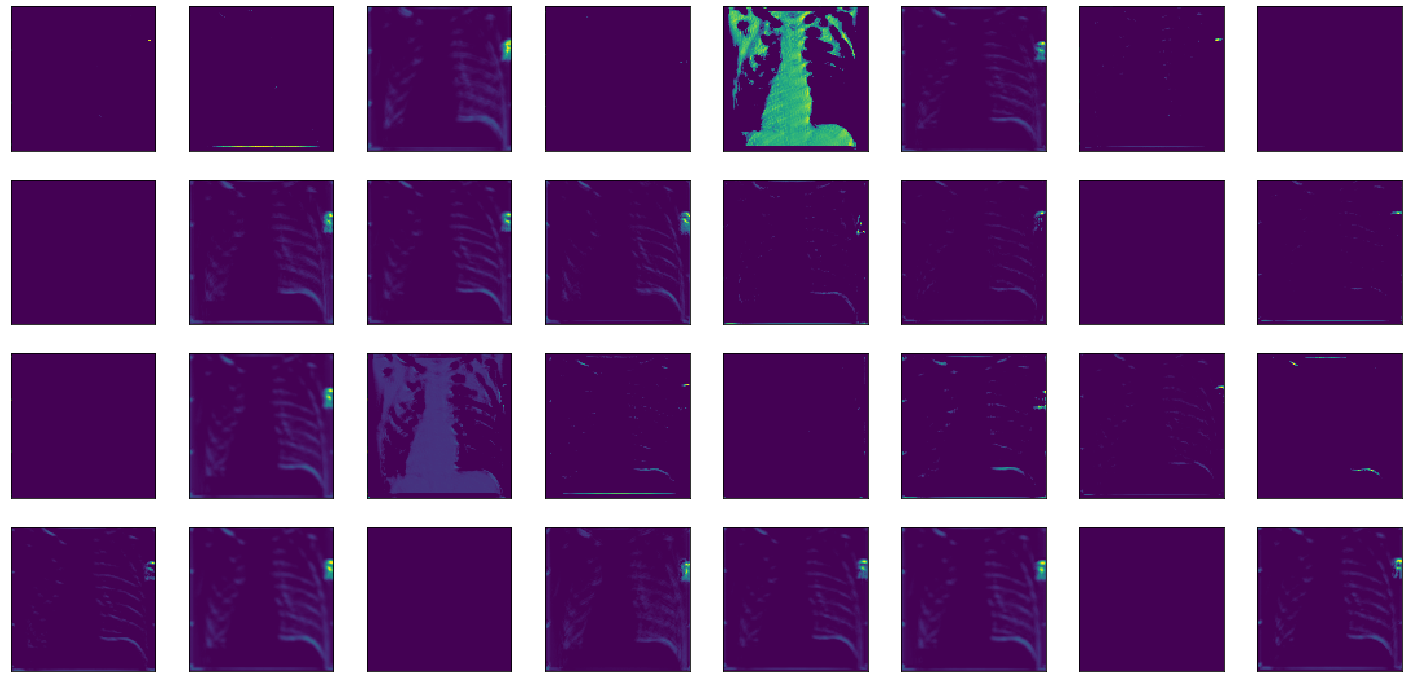

In [220]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(8):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

In [221]:
cam_layer = benchmark.layers[10]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 64, 64)
(64,)


In [0]:
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

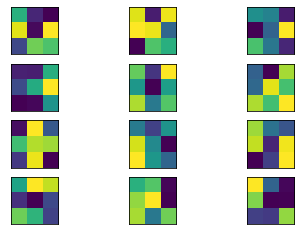

In [223]:
n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()    

In [0]:
model_feature = Model(inputs=benchmark.inputs, outputs=cam_layer.output)

In [225]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 56, 56, 64)

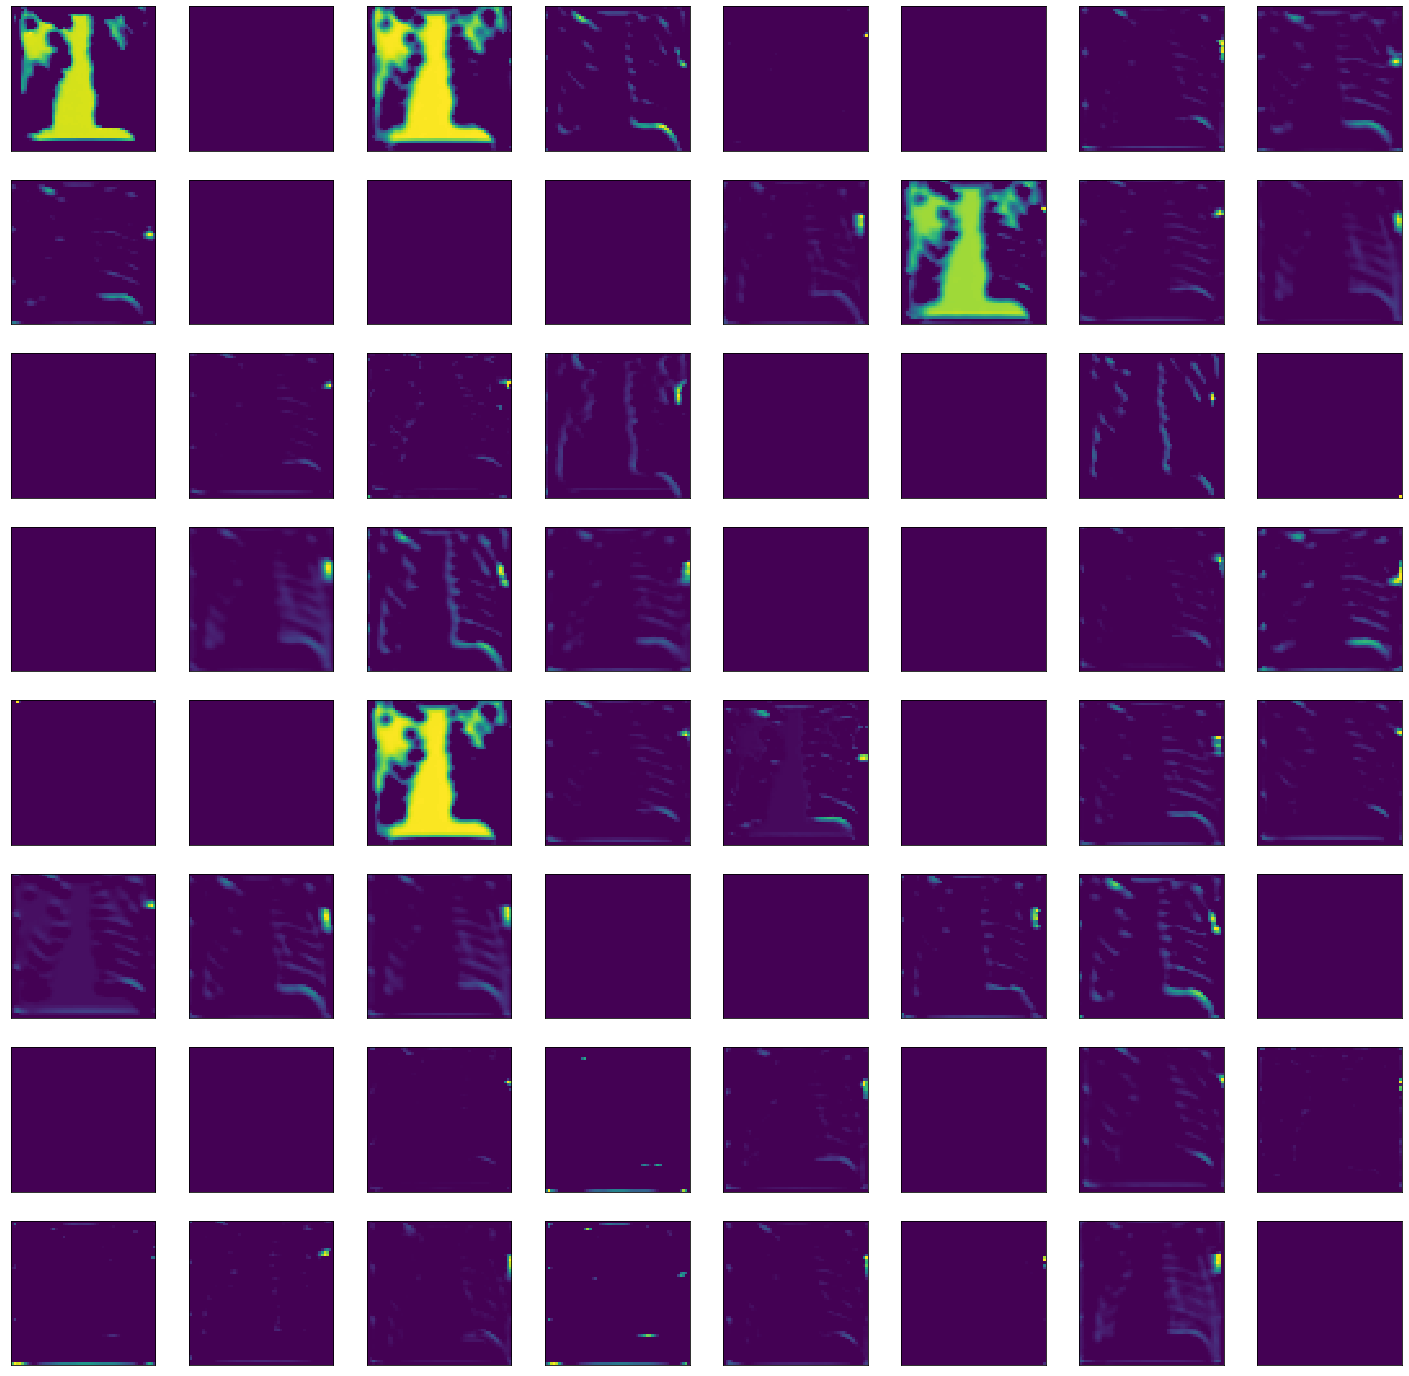

In [226]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(8):
  for _ in range(8):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()